In [1]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from PIL import Image

/Users/alpha/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


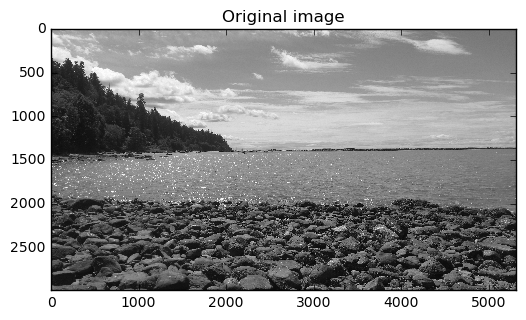

In [2]:

# Image must be grayscale (1-channel)
im = plt.imread('input/wreck_beach.jpg').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')


/Users/alpha/anaconda/lib/python2.7/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


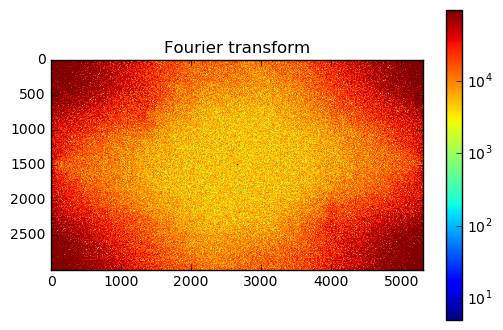

In [3]:

im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5, vmax=95000))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

(2988, 5312)


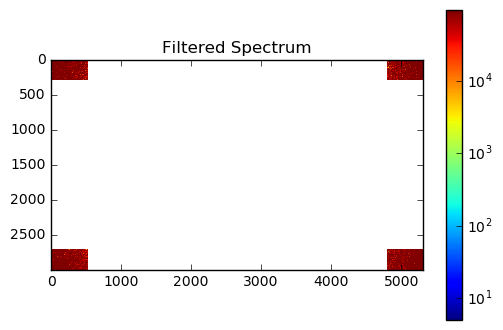

In [9]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
print(im_fft.shape)
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')


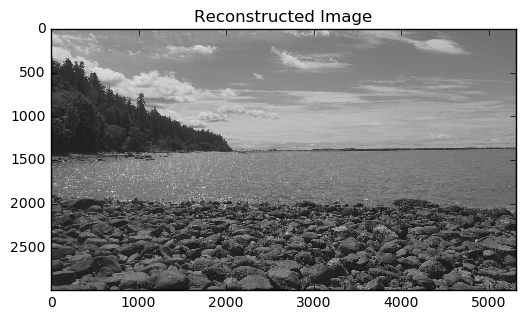

In [10]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [11]:
import scipy.misc
scipy.misc.imsave('output/outfile.jpg', abs(im_fft2*255))

In [12]:
# FFT using numpy

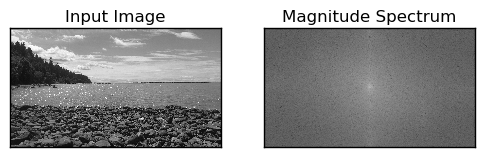

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('input/wreck_beach.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 200*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

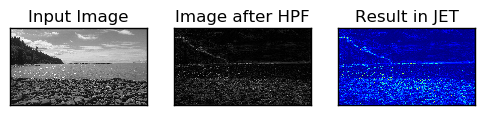

In [15]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
# FFT using OpenCV

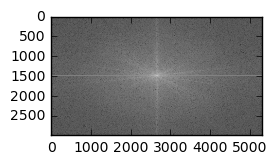

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('input/waterfront_ceiling.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) # Shifts FFT so zer0 is at the center

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

my_dpi = 192
# plt.figure(figsize=(5312/my_dpi, 2988/my_dpi), dpi=my_dpi)

# plt.subplot(121),plt.imshow(img, cmap = 'gray')
# plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
# plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
# plt.savefig('foo.png', figsize=(30, 15), bbox_inches='tight')
plt.show()

In [20]:
magnitude_spectrum.max()

430.73624

In [21]:
my_dpi = 192
plt.figure(figsize=(5312/my_dpi, 2988/my_dpi), dpi=my_dpi)


In [22]:
# normalize magnitude spectrum
mag_norm = magnitude_spectrum * 255.0/magnitude_spectrum.max() 

In [23]:
mag_norm.max()

255.0

In [31]:
img = cv2.imread('input/moonlanding.jpg', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
# img_array = magnitude_spectrum*255/magnitude_spectrum.max()
# img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)

# cv2.imshow("yo", img_and_magnitude)

In [32]:
outImg = Image.fromarray(magnitude_spectrum, 'L')
outImg.save('fft.jpg')
outImg.show()

In [137]:
magnitude_spectrum.shape

(2988, 5312)

In [100]:
magnitude_spectrum.min()

0

In [24]:
import scipy.ndimage
# Load the edited FFT image
fft_image = cv2.imread('output/fft.jpg', 0)

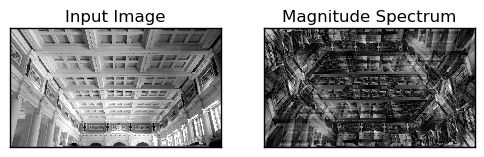

In [25]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
# mask = np.zeros((rows,cols,2),np.uint8)
# mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
# fshift = dft_shift#*mask

# Combine loaded image with dft_shift

combined = dft_shift.copy()
combined[:, :, 1] = fft_image
# dft_shift[:, :, 1] = fft_image
f_ishift = np.fft.ifftshift(combined)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
dft_shift[:, :, 0] = fft_image

In [27]:
dft_shift.shape
# fft_image.shape

(2988, 5312, 2)

In [28]:
dft_shift[:, :, 1]

array([[-3864.9995 , -5319.769  ,  -679.49097, ...,   121.26758,
         -679.49097, -5319.769  ],
       [  927.6665 , -1589.8777 , -2598.229  , ...,  3152.806  ,
         2876.1353 ,  4410.9077 ],
       [ 2500.3867 , -1561.6757 , -1095.462  , ..., -4073.6782 ,
         -226.7279 ,  2321.899  ],
       ...,
       [ -473.5906 ,  -959.1861 ,  1272.3352 , ...,  3216.3188 ,
         1822.0938 , -3858.8638 ],
       [ 2500.386  ,  2321.899  ,  -226.7279 , ...,  3149.8926 ,
        -1095.462  , -1561.6757 ],
       [  927.666  ,  4410.9077 ,  2876.1353 , ..., -5003.831  ,
        -2598.229  , -1589.8777 ]], dtype=float32)